# <center>Review Python Implementation of MMRDNS

In [3]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import useful things from kerr
from kerr.formula.ksm2_cw import CW as cwfit
from kerr.formula.ksm2_sc import SC as scfit
from kerr.pttools import leaver_workfunction as lvrwork
from kerr import leaver,rgb
from kerr.models import mmrdns 

# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
from matplotlib.pyplot import *

#
from nrutils.core.nrsc import scsearch,gwylm

# Other useful things
from numpy import sin,cos,log,exp,pi,linspace,zeros,linalg,array

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <center>Generate a single QNM ringdown Multipole moment

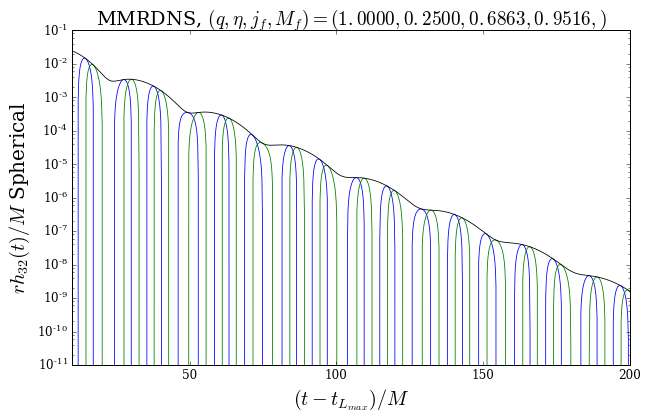

In [4]:
# Define a mass ratio
eta = mmrdns.q2eta(1)
# Define the QNM indeces 
l,m,n = 2,2,0
#
ll,mm = 3,2
# Generate the waveform and plot
hlm = mmrdns.meval_spherical_mode(ll,mm,eta,plot=True)


#### Notes
* The model looks basicall sane, and shows the expect beating behavior for the $(3,2)$ spherical mode
* A detailed comparison of all spherical modes to select calibration NR runs is performed in a separate notebook

## <center>Get model for waveform, and plot internally

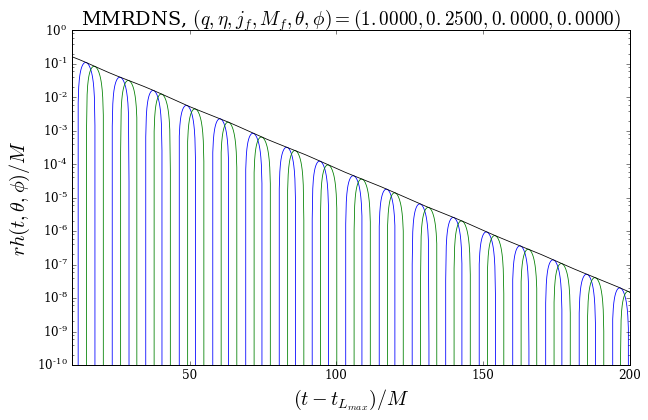

In [5]:
# Define a mass ratio
eta = mmrdns.q2eta(1)
# Define Opbservation angle 
theta,phi = 0,0
# Generate the waveform and plot
h = mmrdns.meval(theta,phi,eta,plot=True)

#### Notes
* Here we have evaluated to inherently spheroidal model:
    1. The model contains fits for the true spheroidal amplitudes for nonspinning BBH mergers
    2. Spherical represenations only contain a portion of this spheroidal information (though surely most of it)
    3. We may optionally compare the model's deption of how spherical and spheroidal depictions match up.
* Question --- *How does MMRDNS' spheroidal represenation comapare to the NR represenation from partial spherical recomposition?*

## <center>Load NR waveform

In [9]:
#
A = scsearch(keyword='sxs',q=2,nonspinning=True,verbose=True,unique=True)[0]

#
y = gwylm(A,lmax=3,verbose=True,clean=True)

[scsearch]>> Found keyword (='sxs') keyword.
[scsearch]>> Found nonspinning (=True) keyword.
[scsearch]>> Found q (=2) keyword.
[scsearch]>> Found unique (=True) keyword.
[scsearch]>> Found validate_remnant (=False) keyword.
[scsearch]>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 unique simulations:
[0001][sxs] SXS0169: qc-ns-q2.00	(SXS0169)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found lmax (=3) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found lowpass (=False) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x10a1fff38>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(load)>> Loading: rMPsi4_Y_l2_m-2.asc
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.275904 wil

# Compare the l=m=2 sherical multipole with MMRDNS' shpheroidal multipole (They should be very similar!)

In [10]:
# Define the mode for comparison
l,m=3,2;n=0
# Define a mass ratio
eta = mmrdns.q2eta( y.m1/y.m2 )
# Get the ringdown data to compare
nr = y.ringdown().lm[(l,m)]['strain'] # NOTE that the default reference time for the ringdown() mthod is the same one used in mmrdns: 10M after the peak luminosity as defined by the l=m=2 mode
ar = mmrdns.meval_spherical_mode(l,m,eta,gwfout=True)( nr.t )

* w0(w22) = -0.031781 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = -0.015891 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = 0.031781 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = 0.015891 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = 0.031781 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = -0.047672 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = -0.031781 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = -0.015891 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = 0.031781 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = 0.015891 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
* w0(w22) = 0.031781 (this is the lower frequency used for FFI method [arxiv:1006.163

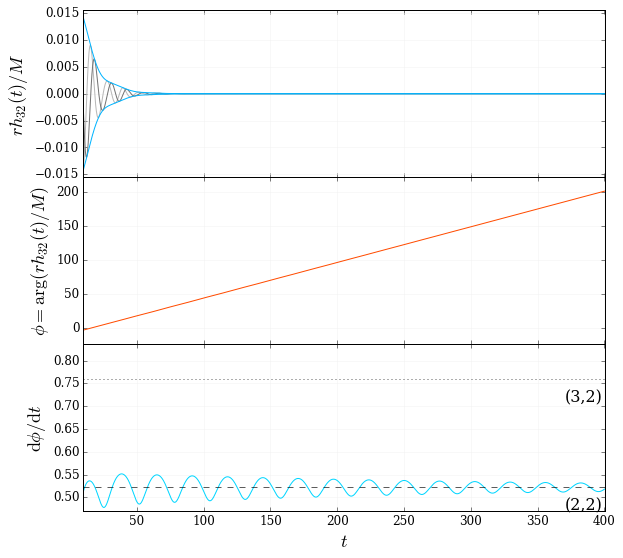

([<matplotlib.axes._subplots.AxesSubplot at 0x109b4e6d0>,
 <matplotlib.figure.Figure at 0x10de674d0>)

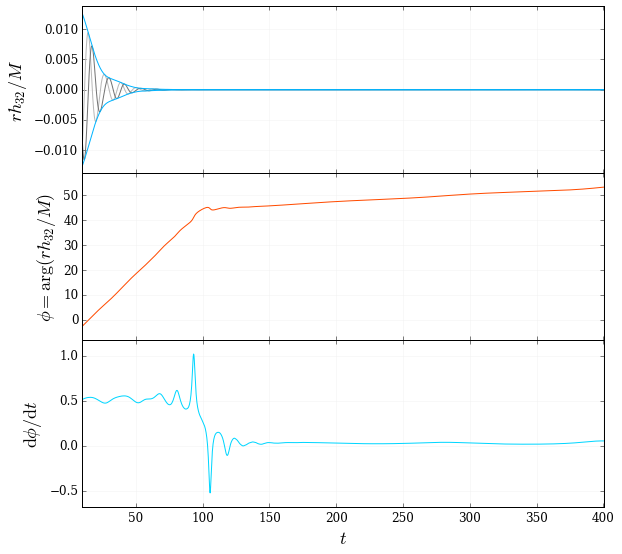

In [11]:
ax,fig = ar.plot(show=False)
from kerr.basics import lim
from numpy import array,diff

sca(ax[2])
w0,w1 = mmrdns.cwfit(l,m,n,eta).real, mmrdns.cwfit(2,m,n,eta).real

clr = 'k'

axhline( w0, linestyle=':', color=clr, alpha=0.8 )
text( diff(lim(ar.t))*0.95, w0-0.05, '(%i,%i)'%(l,m), color=clr )

axhline( w1, linestyle='--', color=clr, alpha=0.8 )
text( diff(lim(ar.t))*0.95, w1-0.05, '(%i,%i)'%(2,m), color=clr )

ylim( min(ylim()), max( max(ylim()),1.1*max(w0,w1) ) )
show()

nr.plot()

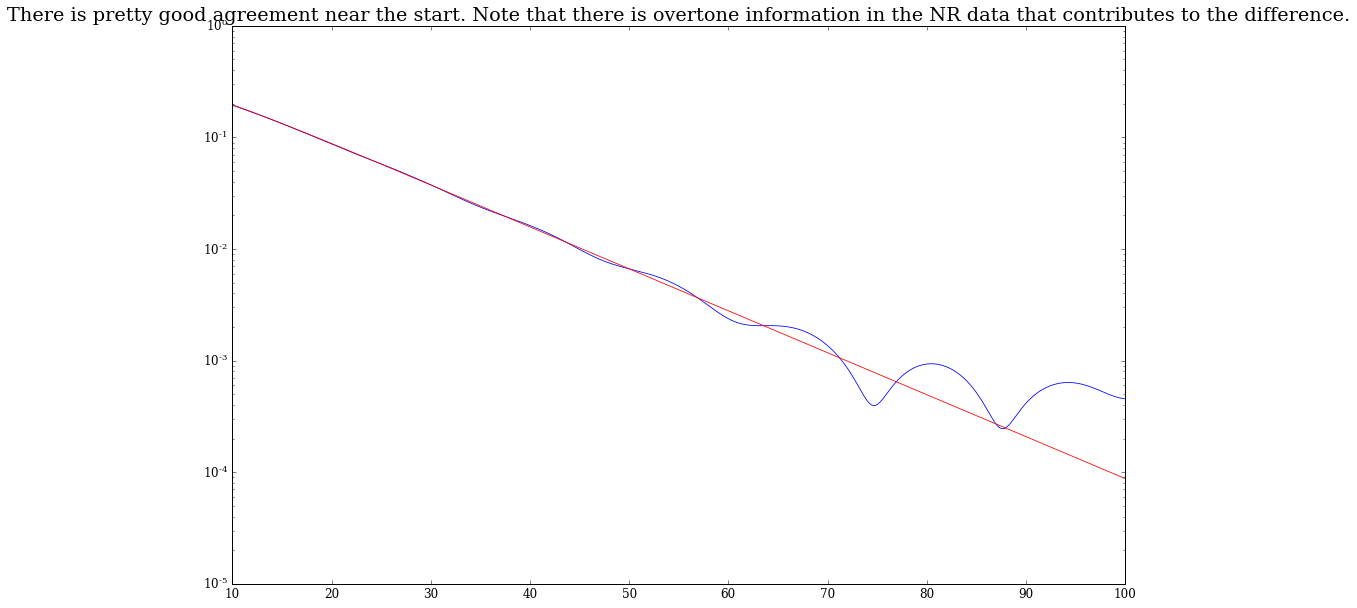

In [45]:
# Plot the amplitudes
fig = figure( figsize=[16,10] )
plot( nr.t, nr.amp ) 
plot( ar.t, ar.amp,'r' ) 
gca().set_yscale("log", nonposy='clip')
xlim([10,100]); ylim(1e-5,1);
title('There is pretty good agreement near the start. Note that there is overtone information in the NR data that contributes to the difference.')

#### Notes
* Here, it is seen that the NR sherical mode and the spherical mode from MMRDNS agree very well
* But how do the recomposed data comapre?

# Now compare the recomposed data

In [49]:
theta=0;phi=0
nr_ = y.ringdown().recompose(theta,phi,kind='strain')
ar_ = mmrdns.meval(theta,phi,eta,gwfout=True)( nr_.t )

(0.00080000000000000004, 0.16)

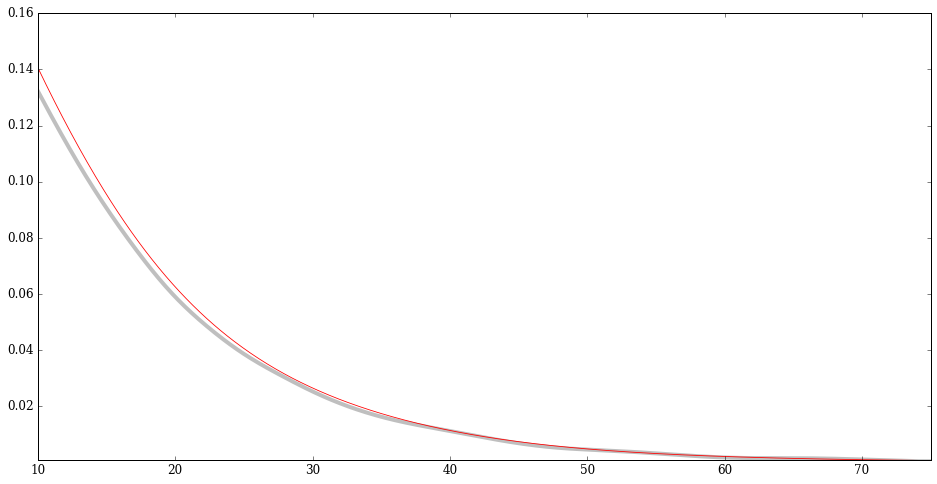

In [52]:
# 
from numpy import sqrt
figure( figsize=8*array((2,1)) )
plot( nr_.t, nr_.amp, 'k', lw=4, alpha=0.25 )
plot( nr_.t, ar_.amp, 'r'  )
ax = gca()
xlim([10,75])
ylim([max(ylim())/200,max(ylim())])
# ax.set_yscale("log", nonposy='clip')

#### Notes
* Here we see that there is an apparent overall amplitude difference between MMRDNS for face-on inclination
* More Questions:
    1. Only use the spherical representation of MMRDNS; is there better agreement?
    2. Is the amplitude difference consitent with the spherical-spheroidal mixing coefficient?